Script that imports a csv file and runs PCA using scikitlearn

In [18]:
#import different packages that are needed for analysis, scipy, numpy, scikitlearn, matplotlib
import numpy as np
import scipy
import sklearn
import matplotlib
import pandas as pd

In [19]:
#import the csv file to be used for analysis using pandas
# set the first column (ID) as index column
data = pd.read_csv("dataforpca.csv", index_col=0)
data

,s_linPPSS,i_linPPSS,r2_linPPSS,s_logPPSS,i_logPPSS,r2_logPPSS,P-AL_4b,Scattered households,Stocking density,PP,...,Pasture land,Agricultural land,Runoff average yearly (mm),Silt_median,Silt_average,Silt_max,Clay + Silt average,Clay*arable,Clay*agricultural land,Silt*agricultural land
ID,,,,,,,,,,,,,,,,,,,,,
C6,0.000830,0.028550,0.820310,0.781208,-2.514948,0.824727,0.111940,10,0.05,0.147711,...,1.6,60.6,220.076923,42,42.028151,60,83.791729,24.640511,25.308728,25.469060
E21,0.001516,0.004275,0.393449,0.777056,-2.578546,0.279182,0.275862,9,0.05,0.023619,...,0.5,89.5,156.846154,32,32.528930,43,48.593446,14.297419,14.377742,29.113392
E23,0.000632,0.061874,0.761639,0.596143,-2.096979,0.625310,0.142251,7,0.60,0.139681,...,8.0,62.0,181.000000,40,40.201626,47,80.018970,21.501366,24.686753,24.925008
F26,0.001564,0.025543,0.661244,0.543898,-1.975404,0.402942,0.000000,33,1.20,0.064427,...,3.0,73.0,482.416667,30,29.877127,48,34.809074,3.452363,3.600321,21.810302
I28,0.002176,0.002388,0.385544,0.595046,-2.174473,0.381934,0.108696,11,0.50,0.041287,...,2.0,86.0,156.000000,34,33.438083,49,52.071238,15.651851,16.024514,28.756751
M36,0.000879,0.047936,0.261654,0.529841,-1.950275,0.525143,0.300000,37,0.30,0.123560,...,0.5,86.5,276.769231,29,28.515999,44,54.085693,21.989937,22.117786,24.666339
M42,0.001515,0.026500,0.527269,0.633800,-2.076228,0.557893,0.378947,10,0.10,0.057806,...,1.5,94.5,282.111111,32,31.975635,45,47.775635,14.694000,14.931000,30.216975
N33,0.001171,0.018088,0.715337,0.747272,-2.387552,0.738267,0.188889,7,0.10,0.091692,...,1.0,88.0,251.166667,38,36.809974,49,57.664230,18.143203,18.351745,32.392777
N34,0.001940,0.011621,0.353516,0.850530,-2.442853,0.676464,0.529412,19,0.40,0.073074,...,0.5,85.5,371.615385,25,28.484804,50,42.391341,11.820556,11.890088,24.354508


In [20]:
#create a subset of the dataframe that contains the variables I want to analyze
data1 = data[['s_linPPSS','Scattered households', 'Stocking density', 'PP', 'SS', 'TP', 
             'DP', 'PP/SS', 'PP/TP', 'P-AL_average', 'Clay_average', 'Ley', 'Cereals & Rape',
             'Mixed crops', 'Agricultural land', 'Silt_average']]
data1

,s_linPPSS,Scattered households,Stocking density,PP,SS,TP,DP,PP/SS,PP/TP,P-AL_average,Clay_average,Ley,Cereals & Rape,Mixed crops,Agricultural land,Silt_average
ID,,,,,,,,,,,,,,,,
C6,0.000830,10,0.05,0.147711,143.571828,0.211402,0.049084,0.001029,0.614493,6.342537,41.763577,12.200566,41.047835,1.000000,60.6,42.028151
E21,0.001516,9,0.05,0.023619,12.691025,0.059372,0.027719,0.001861,0.488662,10.300000,16.064516,8.755979,67.217831,9.680000,89.5,32.528930
E23,0.000632,7,0.60,0.139681,123.637815,0.281123,0.117262,0.001130,0.461734,7.411465,39.817344,14.017762,33.998090,4.440000,62.0,40.201626
F26,0.001564,33,1.20,0.064427,24.859734,0.121163,0.034488,0.002592,0.541876,4.171588,4.931947,51.819896,16.130863,1.490328,73.0,29.877127
I28,0.002176,11,0.50,0.041287,17.815171,0.175817,0.116143,0.002318,0.256850,9.010870,18.633156,14.390921,46.287831,11.786885,86.0,33.438083
M36,0.000879,37,0.30,0.123560,86.192885,0.198983,0.058285,0.001434,0.545943,9.972641,25.569695,26.577911,43.378710,9.360000,86.5,28.515999
M42,0.001515,10,0.10,0.057806,20.606144,0.151312,0.081934,0.002805,0.374003,12.598342,15.800000,6.405501,67.474617,15.260000,94.5,31.975635
N33,0.001171,7,0.10,0.091692,62.037823,0.158162,0.052973,0.001478,0.571294,10.270000,20.854256,13.800388,43.469573,5.350000,88.0,36.809974
N34,0.001940,19,0.40,0.073074,31.746222,0.102850,0.018537,0.002302,0.698377,14.240000,13.906536,11.740334,42.059173,15.740000,85.5,28.484804


When the dataset is imported as a dataframe, plot some of the variables to look at them, before PCA

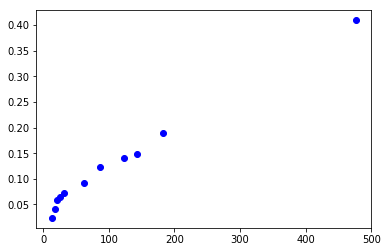

In [29]:
#make plots in the notebook
import matplotlib.pyplot as plt
%matplotlib inline
PP=data1[['PP']]
SS=data1[['SS']]
Clay=data1[['Clay_average']]
plt.plot(SS,PP, 'bo')
plt.show()

ValueError: 'c' argument must either be valid as mpl color(s) or as numbers to be mapped to colors. Here c =      Clay_average
ID               
C6      41.763577
E21     16.064516
E23     39.817344
F26      4.931947
I28     18.633156
M36     25.569695
M42     15.800000
N33     20.854256
N34     13.906536
O18     35.173913
U8      50.031227.

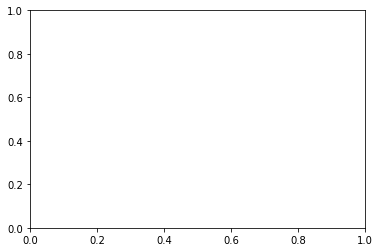

In [34]:
#create a bubbleplot instead
import matplotlib.colors
plt.scatter(SS,PP, c=Clay, cmap='Colormap')
plt.show()